In [1]:
# importing libraries
import time
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [65]:
# Load the dataset
df = pd.read_csv("players_20.csv")

In [66]:
df.shape

(18278, 69)

In [67]:
df.head()


,sofifa_id,short_name,long_name,age,height_cm,weight_kg,nationality,club,overall,potential,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,32,170,72,Argentina,FC Barcelona,94,94,...,75,96,33,37,26,6,11,15,14,8
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,187,83,Portugal,Juventus,93,93,...,85,95,28,32,24,7,11,15,14,11
2,190871,Neymar Jr,Neymar da Silva Santos Junior,27,175,68,Brazil,Paris Saint-Germain,92,92,...,90,94,27,26,29,9,9,15,15,11
3,200389,J. Oblak,Jan Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,...,11,68,27,12,18,87,92,78,90,89
4,183277,E. Hazard,Eden Hazard,28,175,74,Belgium,Real Madrid,91,91,...,88,91,34,27,22,11,12,6,8,8


In [68]:
df.info

<bound method DataFrame.info of        sofifa_id         short_name                            long_name  age  \
0         158023           L. Messi       Lionel Andrés Messi Cuccittini   32   
1          20801  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34   
2         190871          Neymar Jr        Neymar da Silva Santos Junior   27   
3         200389           J. Oblak                            Jan Oblak   26   
4         183277          E. Hazard                          Eden Hazard   28   
...          ...                ...                                  ...  ...   
18273     245006         Shao Shuai                                   邵帅   22   
18274     250995       Xiao Mingjie                         Mingjie Xiao   22   
18275     252332          Zhang Wei                                   张威   19   
18276     251110       Wang Haijian                                  汪海健   18   
18277     233449         Pan Ximing                                  潘喜明   26

In [69]:
df.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,...,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,...,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,...,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,...,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,...,39.000000,51.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,226165.000000,25.000000,181.000000,75.000000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,...,49.000000,60.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,240795.750000,29.000000,186.000000,80.000000,71.000000,75.000000,2.100000e+06,8000.000000,1.000000,3.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,252905.000000,42.000000,205.000000,110.000000,94.000000,95.000000,1.055000e+08,565000.000000,5.000000,5.000000,...,92.000000,96.000000,94.000000,92.000000,90.000000,90.000000,92.000000,93.000000,91.000000,92.000000


In [70]:
df.isnull().sum()

sofifa_id                  0
short_name                 0
long_name                  0
age                        0
height_cm                  0
                          ..
goalkeeping_diving         0
goalkeeping_handling       0
goalkeeping_kicking        0
goalkeeping_positioning    0
goalkeeping_reflexes       0
Length: 69, dtype: int64

In [71]:
duplicateDFRow = df[df.duplicated()] # check
print(duplicateDFRow)
df = df.drop_duplicates()

Empty DataFrame
Columns: [sofifa_id, short_name, long_name, age, height_cm, weight_kg, nationality, club, overall, potential, value_eur, wage_eur, player_positions, preferred_foot, international_reputation, weak_foot, skill_moves, work_rate, team_position, team_jersey_number, nation_position, nation_jersey_number, pace, shooting, passing, dribbling, defending, physic, gk_diving, gk_handling, gk_kicking, gk_reflexes, gk_speed, gk_positioning, player_traits, attacking_crossing, attacking_finishing, attacking_heading_accuracy, attacking_short_passing, attacking_volleys, skill_dribbling, skill_curve, skill_fk_accuracy, skill_long_passing, skill_ball_control, movement_acceleration, movement_sprint_speed, movement_agility, movement_reactions, movement_balance, power_shot_power, power_jumping, power_stamina, power_strength, power_long_shots, mentality_aggression, mentality_interceptions, mentality_positioning, mentality_vision, mentality_penalties, mentality_composure, defending_marking, defe

In [72]:
df.shape

(18278, 69)

In [73]:
df.drop(columns=["long_name","short_name","team_position","nation_position","team_jersey_number","nation_jersey_number","player_traits","gk_diving","gk_handling","gk_kicking","gk_reflexes",'gk_speed','gk_positioning','value_eur'], inplace=True)

In [74]:
df['average_skill']=df[['skill_dribbling','skill_curve','skill_fk_accuracy','skill_long_passing','skill_ball_control']].mean(axis=1)
print(df['average_skill'])

0        94.4
1        83.0
2        89.4
3        21.8
4        86.8
         ... 
18273    26.2
18274    31.0
18275    41.6
18276    43.0
18277    41.4
Name: average_skill, Length: 18278, dtype: float64


In [75]:
df['average_attacking']=df[['attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys']].mean(axis=1)
print(df['average_attacking'])

0        86.6
1        87.4
2        82.0
3        19.0
4        79.6
         ... 
18273    28.0
18274    31.4
18275    39.8
18276    40.4
18277    41.0
Name: average_attacking, Length: 18278, dtype: float64


In [76]:
df['average_movement']=df[['movement_acceleration','movement_sprint_speed','movement_agility','movement_reactions','movement_balance']].mean(axis=1)
print(df['average_movement'])

0        91.6
1        86.8
2        91.0
3        61.4
4        92.2
         ... 
18273    54.4
18274    55.2
18275    54.0
18276    57.2
18277    58.0
Name: average_movement, Length: 18278, dtype: float64


In [77]:
df['average_power']=df[['power_shot_power','power_jumping','power_stamina','power_strength','power_long_shots']].mean(axis=1)
print(df['average_power'])

0        78.2
1        89.2
2        71.0
3        53.6
4        73.0
         ... 
18273    45.8
18274    44.8
18275    47.0
18276    46.4
18277    47.2
Name: average_power, Length: 18278, dtype: float64


In [78]:
df['average_mentality']=df[['mentality_aggression','mentality_positioning','mentality_penalties','mentality_composure','mentality_interceptions', 'mentality_vision']].mean(axis=1)
print(df['average_mentality'])

0        74.500000
1        74.833333
2        74.666667
3        34.666667
4        75.000000
           ...    
18273    37.833333
18274    35.166667
18275    41.000000
18276    43.500000
18277    43.666667
Name: average_mentality, Length: 18278, dtype: float64


In [79]:
df['average_defending']=df[['defending_marking','defending_standing_tackle','defending_sliding_tackle']].mean(axis=1)
print(df['average_defending'])

0        32.000000
1        28.000000
2        27.333333
3        19.000000
4        27.666667
           ...    
18273    49.000000
18274    50.666667
18275    48.000000
18276    45.666667
18277    47.333333
Name: average_defending, Length: 18278, dtype: float64


In [80]:
df['average_goalkeeping']=df[['goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking','goalkeeping_positioning','goalkeeping_reflexes']].mean(axis=1)
print(df['average_goalkeeping'])

0        10.8
1        11.6
2        11.8
3        87.2
4         9.0
         ... 
18273     8.4
18274    10.6
18275     9.0
18276    12.4
18277    10.6
Name: average_goalkeeping, Length: 18278, dtype: float64


In [81]:
df.drop(columns=['movement_acceleration','movement_sprint_speed','movement_agility','movement_reactions','movement_balance','power_shot_power','power_jumping','power_stamina','power_strength','power_long_shots','mentality_aggression','mentality_positioning','mentality_penalties','mentality_composure','mentality_interceptions', 'mentality_vision','defending_marking','defending_standing_tackle','defending_sliding_tackle','goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking','goalkeeping_positioning','goalkeeping_reflexes','attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys','skill_dribbling','skill_curve','skill_fk_accuracy','skill_long_passing','skill_ball_control'],inplace=True)

In [82]:
df.shape

(18278, 28)

In [83]:
df.columns

Index(['sofifa_id', 'age', 'height_cm', 'weight_kg', 'nationality', 'club',
       'overall', 'potential', 'wage_eur', 'player_positions',
       'preferred_foot', 'international_reputation', 'weak_foot',
       'skill_moves', 'work_rate', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'average_skill', 'average_attacking',
       'average_movement', 'average_power', 'average_mentality',
       'average_defending', 'average_goalkeeping'],
      dtype='object')

# LABEL ENCODING


In [84]:
df.dtypes

sofifa_id                     int64
age                           int64
height_cm                     int64
weight_kg                     int64
nationality                  object
club                         object
overall                       int64
potential                     int64
wage_eur                      int64
player_positions             object
preferred_foot               object
international_reputation      int64
weak_foot                     int64
skill_moves                   int64
work_rate                    object
pace                        float64
shooting                    float64
passing                     float64
dribbling                   float64
defending                   float64
physic                      float64
average_skill               float64
average_attacking           float64
average_movement            float64
average_power               float64
average_mentality           float64
average_defending           float64
average_goalkeeping         

In [85]:
from sklearn.preprocessing import LabelEncoder
columns=['club','nationality','player_positions','preferred_foot','work_rate']
le=LabelEncoder()
for col in columns:
    df[col] = le.fit_transform(df[col])

print(df)

       sofifa_id  age  height_cm  weight_kg  nationality  club  overall  \
0         158023   32        170         72            5   224       94   
1          20801   34        187         83          121   350       93   
2         190871   27        175         68           18   462       92   
3         200389   26        188         87          133    63       91   
4         183277   28        175         74           12   505       91   
...          ...  ...        ...        ...          ...   ...      ...   
18273     245006   22        186         79           28    79       48   
18274     250995   22        177         66           28   574       48   
18275     252332   19        186         75           28   317       48   
18276     251110   18        185         74           28   573       48   
18277     233449   26        182         78           28   317       48   

       potential  wage_eur  player_positions  ...  dribbling  defending  \
0             94    5650

In [86]:
columns_to_fill = ['pace', 'shooting', 'dribbling', 'defending', 'physic', 'passing']
df.fillna(df[columns_to_fill].mean(), inplace=True)
# df.drop(columns=['pace', 'shooting', 'dribbling', 'defending', 'physic', 'passing'],inplace=True)

In [87]:
object_columns = df.select_dtypes(include=['object']).columns
print(object_columns)

Index([], dtype='object')


In [88]:
nan_values = df.isna().sum()
nan_values

sofifa_id                   0
age                         0
height_cm                   0
weight_kg                   0
nationality                 0
club                        0
overall                     0
potential                   0
wage_eur                    0
player_positions            0
preferred_foot              0
international_reputation    0
weak_foot                   0
skill_moves                 0
work_rate                   0
pace                        0
shooting                    0
passing                     0
dribbling                   0
defending                   0
physic                      0
average_skill               0
average_attacking           0
average_movement            0
average_power               0
average_mentality           0
average_defending           0
average_goalkeeping         0
dtype: int64

# **EDA**

In [95]:
X = df
y = df['overall']
corr = X.corr()
corr.style.background_gradient(cmap='coolwarm')

,sofifa_id,age,height_cm,weight_kg,nationality,club,overall,potential,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,pace,shooting,passing,dribbling,defending,physic,average_skill,average_attacking,average_movement,average_power,average_mentality,average_defending,average_goalkeeping
sofifa_id,1.000000,-0.736680,-0.093464,-0.203620,-0.004378,-0.031298,-0.445061,0.042015,-0.228084,0.012803,-0.007349,-0.360765,-0.092250,-0.079645,0.088672,0.145834,-0.246711,-0.330623,-0.199895,-0.202614,-0.333371,-0.156383,-0.155565,-0.006552,-0.280343,-0.263559,-0.097212,-0.117500
age,-0.736680,1.000000,0.081391,0.237169,-0.032600,-0.010306,0.464305,-0.262872,0.151031,-0.031916,0.006451,0.259582,0.073988,0.045277,-0.093286,-0.185087,0.219839,0.304022,0.148939,0.239156,0.400410,0.132553,0.147495,-0.032349,0.294866,0.264678,0.127282,0.115175
height_cm,-0.093464,0.081391,1.000000,0.768816,0.009265,0.027296,0.039945,-0.002432,0.019547,-0.131949,0.083072,0.037935,-0.175200,-0.429980,0.185027,-0.389155,-0.183445,-0.261704,-0.372236,0.194886,0.441560,-0.466655,-0.374373,-0.640911,-0.161485,-0.309677,-0.075668,0.371351
weight_kg,-0.203620,0.237169,0.768816,1.000000,-0.025457,0.017202,0.156522,-0.011738,0.065946,-0.084519,0.077787,0.090854,-0.128568,-0.352060,0.129082,-0.346520,-0.085428,-0.163521,-0.269234,0.195633,0.520913,-0.369559,-0.284572,-0.538106,-0.031109,-0.208247,-0.056978,0.346813
nationality,-0.004378,-0.032600,0.009265,-0.025457,1.000000,0.019029,-0.017100,0.000149,-0.026189,0.012750,0.006661,-0.011211,-0.004345,-0.017926,-0.001357,-0.017911,0.002845,0.012944,0.004078,0.000177,-0.039244,-0.001158,-0.012254,-0.021579,-0.032474,-0.011839,-0.007597,0.015052
club,-0.031298,-0.010306,0.027296,0.017202,0.019029,1.000000,0.016991,0.014784,-0.003923,0.006828,0.000989,0.007116,0.011183,0.006640,-0.016037,-0.001108,0.008670,0.013980,0.012707,0.007396,0.012635,0.007207,0.006517,0.002175,0.012634,0.012254,0.004230,0.000409
overall,-0.445061,0.464305,0.039945,0.156522,-0.017100,0.016991,1.000000,0.646650,0.573578,-0.007584,-0.034474,0.475557,0.230276,0.401261,-0.234792,0.147436,0.462061,0.634747,0.557936,0.310705,0.480003,0.459837,0.457897,0.334067,0.579621,0.560615,0.262355,-0.012837
potential,0.042015,-0.262872,-0.002432,-0.011738,0.000149,0.014784,0.646650,1.000000,0.475490,-0.019913,-0.030620,0.341221,0.171354,0.328440,-0.133453,0.213878,0.283850,0.396658,0.421197,0.141559,0.138609,0.321026,0.303594,0.293699,0.298922,0.332978,0.150063,-0.051934
wage_eur,-0.228084,0.151031,0.019547,0.065946,-0.026189,-0.003923,0.573578,0.475490,1.000000,0.007940,-0.013084,0.652061,0.149405,0.263147,-0.140985,0.109426,0.290814,0.389212,0.357571,0.159616,0.215062,0.283427,0.281559,0.210980,0.304819,0.330674,0.137244,-0.024007
player_positions,0.012803,-0.031916,-0.131949,-0.084519,0.012750,0.006828,-0.007584,-0.019913,0.007940,1.000000,0.060146,0.004966,0.104461,0.208972,-0.182683,0.382146,0.444567,-0.011921,0.297605,-0.589162,-0.145709,0.120670,0.243933,0.276513,0.167764,0.029817,-0.461538,-0.068124


[0.04022542 0.04015203 0.03810463 0.03829889 0.03931968 0.03926832
 0.04913417 0.03113483 0.01827993 0.00679205 0.02666169 0.01300444
 0.02463767 0.0341999  0.04053558 0.0413135  0.04743859 0.05549148
 0.03857694 0.04359069 0.05021625 0.04168396 0.04528941 0.04898161
 0.05650454 0.05116381]


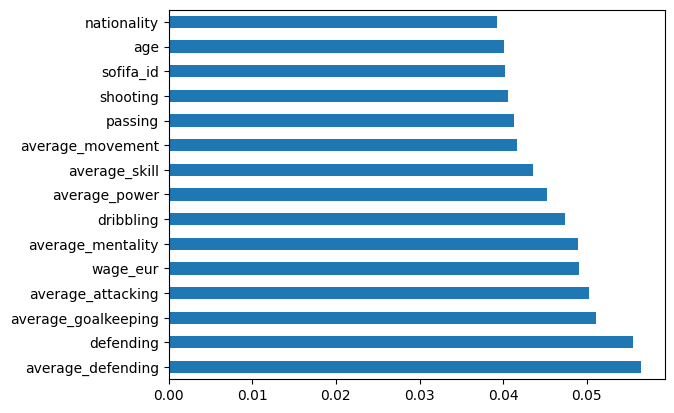

In [27]:
#features selection technique (select those features in your data that contribute most to the prediction).
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
X = X.fillna(0)
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)


feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [60]:
X.shape

(18278, 26)

# Feature Scaling

In [90]:
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame containing the dataset
# Print out the column names of your DataFrame to verify them
print(df.columns)

# Update the list of numerical features with the correct column names
numerical_features = ['age', 'height_cm', 'weight_kg', 'overall', 'international_reputation', 'weak_foot', 'skill_moves', 'wage_eur']

# Creating a DataFrame containing only the numerical features
numerical_df = df[numerical_features]

# Initializing StandardScaler
scaler = StandardScaler()

# Fitting the scaler to the numerical features
scaler.fit(numerical_df)

# Transforming the numerical features using the fitted scaler
scaled_numerical_df = scaler.transform(numerical_df)

# Replace the original numerical features in df with their scaled values
df[numerical_features] = scaled_numerical_df

# Displaying the updated DataFrame with scaled numerical features
print(df.head())

Index(['sofifa_id', 'age', 'height_cm', 'weight_kg', 'nationality', 'club',
       'overall', 'potential', 'wage_eur', 'player_positions',
       'preferred_foot', 'international_reputation', 'weak_foot',
       'skill_moves', 'work_rate', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'average_skill', 'average_attacking',
       'average_movement', 'average_power', 'average_mentality',
       'average_defending', 'average_goalkeeping'],
      dtype='object')
   sofifa_id       age  height_cm  weight_kg  nationality  club   overall  \
0     158023  1.442333  -1.681598  -0.464891            5   224  3.993662   
1      20801  1.871809   0.834394   1.095935          121   350  3.849772   
2     190871  0.368643  -0.941600  -1.032464           18   462  3.705883   
3     200389  0.153905   0.982394   1.663508          133    63  3.561993   
4     183277  0.583381  -0.941600  -0.181104           12   505  3.561993   

   potential   wage_eur  player_positions  ...

In [91]:
df.head()

,sofifa_id,age,height_cm,weight_kg,nationality,club,overall,potential,wage_eur,player_positions,...,dribbling,defending,physic,average_skill,average_attacking,average_movement,average_power,average_mentality,average_defending,average_goalkeeping
0,158023,1.442333,-1.681598,-0.464891,5,224,3.993662,94,26.019375,544,...,96.000000,39.000000,66.000000,94.4,86.6,91.6,78.2,74.500000,32.000000,10.8
1,20801,1.871809,0.834394,1.095935,121,350,3.849772,93,18.525626,620,...,89.000000,35.000000,78.000000,83.0,87.4,86.8,89.2,74.833333,28.000000,11.6
2,190871,0.368643,-0.941600,-1.032464,18,462,3.705883,92,13.139495,344,...,95.000000,32.000000,58.000000,89.4,82.0,91.0,71.0,74.666667,27.333333,11.8
3,200389,0.153905,0.982394,1.663508,133,63,3.561993,93,5.411566,226,...,62.531585,51.553503,64.876678,21.8,19.0,61.4,53.6,34.666667,19.000000,87.2
4,183277,0.583381,-0.941600,-0.181104,12,505,3.561993,91,21.569962,350,...,94.000000,35.000000,66.000000,86.8,79.6,92.2,73.0,75.000000,27.666667,9.0


# Model Split Train

In [97]:
X = df.drop(['overall','potential'],axis=1)
# y = df['overall']
# X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_ability = df['overall']
y_potential = df['potential']
X_train, X_test, y_ability_train, y_ability_test, y_potential_train, y_potential_test = train_test_split(X, y_ability, y_potential, test_size=0.2, random_state=42)
print('shape of X_train:',X_train.shape,
      'shape of X_test:',X_test.shape,
      'shape of y_ability_train:',y_ability_train.shape,
      'shape of y_ability_test:',y_ability_test.shape,
      'shape of y_potential_train:',y_potential_train.shape,
      'shape of y_potential_test:',y_potential_test.shape )

shape of X_train: (14622, 26) shape of X_test: (3656, 26) shape of y_ability_train: (14622,) shape of y_ability_test: (3656,) shape of y_potential_train: (14622,) shape of y_potential_test: (3656,)


# **Linear Regression**

In [101]:
from sklearn.linear_model import LinearRegression

ability_model = LinearRegression()
ability_model.fit(X_train,y_ability_train)
potential_model = LinearRegression()
potential_model.fit(X_train,y_potential_train)

ability_predictions=ability_model.predict(X_test)
potential_predictions=potential_model.predict(X_test)

ability_accuracy_score = ability_model.score(X_train, y_ability_train)
potential_accuracy_score = potential_model.score(X_train,y_potential_train)
print('Model Accuracy (R-squared) for ability:', ability_accuracy_score)
print('Model Accuracy (R-squared) for potential:', potential_accuracy_score)
print('-----------------------------------------------------------------')
# Root Mean Squared Error (RMSE)
ability_rmse = mean_squared_error(y_ability_test,ability_predictions,squared=False)
potential_rmse = mean_squared_error(y_potential_test,potential_predictions,squared=False)
print('Root Mean Squared Error (RMSE) for ability:', ability_rmse)
print('Root Mean Squared Error (RMSE) for potential:', potential_rmse)
print('-----------------------------------------------------------------')
# Mean Absolute Error (MAE)
ability_mae = mean_absolute_error(y_ability_test, ability_predictions)
potential_mae = mean_absolute_error(y_potential_test,potential_predictions)
print('Mean Absolute Error (MAE) for ability:', ability_mae)
print('Mean Absolute Error (MAE) for potential:', potential_mae)

Model Accuracy (R-squared) for ability: 0.812558417506374
Model Accuracy (R-squared) for potential: 0.6487658950743831
-----------------------------------------------------------------
Root Mean Squared Error (RMSE) for ability: 0.44201615468549593
Root Mean Squared Error (RMSE) for potential: 3.746980140500528
-----------------------------------------------------------------
Mean Absolute Error (MAE) for ability: 0.3459469451544248
Mean Absolute Error (MAE) for potential: 2.9750895163566007


# Random Forest Parallel Computing

In [83]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
import time

start_time = time.time()
# Create RandomForestRegressor with parallel processing
rf_regressor = RandomForestRegressor(n_jobs=-1)

# Create pipeline
pipeline = make_pipeline(rf_regressor)

# Fit the pipeline
pipeline.fit(X_train, Y_train)

# Predictions
y_pred = pipeline.predict(X_test)

# Model Accuracy (R-squared)
accuracy_score = pipeline.score(X_train, Y_train)
print('Model Accuracy (R-squared):', accuracy_score)
# Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, y_pred)
print('Mean Squared Error (MSE):', mse)
# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE):', rmse)
# Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, y_pred)
print('Mean Absolute Error (MAE):', mae)
# R-squared (R2)
r2 = r2_score(Y_test, y_pred)
print('R-squared (R2):', r2)
# Mean Percentage Error (MPE)
mpe = np.mean((Y_test - y_pred) / Y_test) * 100
print('Mean Percentage Error (MPE):', mpe)
# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((Y_test - y_pred) / Y_test)) * 100
print('Mean Absolute Percentage Error (MAPE):', mape)

end_time = time.time()

# Execution time
execution_time = end_time - start_time
print('Execution Time:', execution_time, 'seconds')

Model Accuracy: 0.9920491177701175
Root Mean Squared Error (RMSE): 0.22563663364758652
Execution Time: 0.7805685997009277 seconds


# Pipeline

In [102]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
import numpy as np
import time


start_time = time.time()

ability_pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())
ability_pipeline.fit(X_train,y_ability_train)
potential_pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())
potential_pipeline.fit(X_train,y_potential_train)

ability_predictions=ability_pipeline.predict(X_test)
potential_predictions=potential_pipeline.predict(X_test)

ability_accuracy_score = ability_pipeline.score(X_train, y_ability_train)
potential_accuracy_score = potential_pipeline.score(X_train,y_potential_train)
print('Model Accuracy (R-squared) for ability:', ability_accuracy_score)
print('Model Accuracy (R-squared) for potential:', potential_accuracy_score)
print('-----------------------------------------------------------------')
# Root Mean Squared Error (RMSE)
ability_rmse = mean_squared_error(y_ability_test,ability_predictions,squared=False)
potential_rmse = mean_squared_error(y_potential_test,potential_predictions,squared=False)
print('Root Mean Squared Error (RMSE) for ability:', ability_rmse)
print('Root Mean Squared Error (RMSE) for potential:', potential_rmse)
print('-----------------------------------------------------------------')
# Mean Absolute Error (MAE)
ability_mae = mean_absolute_error(y_ability_test, ability_predictions)
potential_mae = mean_absolute_error(y_potential_test,potential_predictions)
print('Mean Absolute Error (MAE) for ability:', ability_mae)
print('Mean Absolute Error (MAE) for potential:', potential_mae)

Model Accuracy (R-squared) for ability: 0.9649310764854708
Model Accuracy (R-squared) for potential: 0.8906746019048516
-----------------------------------------------------------------
Root Mean Squared Error (RMSE) for ability: 0.1927703756859445
Root Mean Squared Error (RMSE) for potential: 2.1413965784426114
-----------------------------------------------------------------
Mean Absolute Error (MAE) for ability: 0.15024731341981096
Mean Absolute Error (MAE) for potential: 1.6263149639909347
